In [34]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from ast import literal_eval
import scipy.stats as st
import seaborn as sns
import numpy
from scipy.stats import linregress

In [2]:
# Filtered Dataset
filtered_data = Path("Datasets/filtered_data.csv")
filtered_df = pd.read_csv(filtered_data)
filtered_df

,Movie Name,Vote Average,Vote Count,Production Companies,Revenue,Year of Release,Movie Rating,Votes,Gross,Genre,Certification,Director
0,Mother's Day,6.0,94,['Akson Studio'],0,2016.0,5.6,38894.0,32460000.0,"['Comedy', ' Drama', ' Romance']",PG-13,['Garry Marshall']
1,Spider-Man: Into the Spider-Verse,8.4,13081,"['Columbia Pictures', 'Lord Miller', 'Pascal P...",375464627,2018.0,8.4,632177.0,190240000.0,"['Animation', ' Action', ' Adventure']",PG,"['Bob Persichetti', 'Peter Ramsey', 'Rodney Ro..."
2,Transformers: Age of Extinction,5.9,7359,"['di Bonaventura Pictures', 'Tom DeSanto/Don M...",1104054072,2014.0,5.6,326960.0,245440000.0,"['Action', ' Adventure', ' Sci-Fi']",PG-13,['Michael Bay']
3,Transformers: The Last Knight,6.1,5548,"['Paramount', 'di Bonaventura Pictures', 'Ian ...",605425157,2017.0,5.2,164230.0,130170000.0,"['Action', ' Adventure', ' Sci-Fi']",PG-13,['Michael Bay']
4,Guardians of the Galaxy Vol. 2,7.6,19898,['Marvel Studios'],863756051,2017.0,7.6,736895.0,389810000.0,"['Action', ' Adventure', ' Comedy']",PG-13,['James Gunn']
...,...,...,...,...,...,...,...,...,...,...,...,...
1379,The Butler,7.3,2692,"['Follow Through Productions', 'Salamander Pic...",115922175,2013.0,7.2,118325.0,116630000.0,"['Biography', ' Drama']",PG-13,['Lee Daniels']
1380,High-Rise,5.7,1038,"['HanWay Films', 'SCOPE Pictures', 'Recorded P...",346472,2015.0,5.5,44402.0,340000.0,"['Drama', ' Sci-Fi']",R,['Ben Wheatley']
1381,The Birth of a Nation,6.1,468,['Epoch Film Co.'],11000000,2016.0,6.5,21628.0,15860000.0,"['Biography', ' Drama', ' History']",R,['Nate Parker']
1382,Little Boy,7.2,485,"['Santa Fé Films', 'Metanoia Films']",6485961,2015.0,7.3,23885.0,6420000.0,"['Drama', ' History', ' War']",PG-13,['Alejandro Monteverde']


In [3]:
filtered_df['Director'] = filtered_df['Director'].apply(literal_eval)
split_data = filtered_df.explode('Director')
split_data

,Movie Name,Vote Average,Vote Count,Production Companies,Revenue,Year of Release,Movie Rating,Votes,Gross,Genre,Certification,Director
0,Mother's Day,6.0,94,['Akson Studio'],0,2016.0,5.6,38894.0,32460000.0,"['Comedy', ' Drama', ' Romance']",PG-13,Garry Marshall
1,Spider-Man: Into the Spider-Verse,8.4,13081,"['Columbia Pictures', 'Lord Miller', 'Pascal P...",375464627,2018.0,8.4,632177.0,190240000.0,"['Animation', ' Action', ' Adventure']",PG,Bob Persichetti
1,Spider-Man: Into the Spider-Verse,8.4,13081,"['Columbia Pictures', 'Lord Miller', 'Pascal P...",375464627,2018.0,8.4,632177.0,190240000.0,"['Animation', ' Action', ' Adventure']",PG,Peter Ramsey
1,Spider-Man: Into the Spider-Verse,8.4,13081,"['Columbia Pictures', 'Lord Miller', 'Pascal P...",375464627,2018.0,8.4,632177.0,190240000.0,"['Animation', ' Action', ' Adventure']",PG,Rodney Rothman
2,Transformers: Age of Extinction,5.9,7359,"['di Bonaventura Pictures', 'Tom DeSanto/Don M...",1104054072,2014.0,5.6,326960.0,245440000.0,"['Action', ' Adventure', ' Sci-Fi']",PG-13,Michael Bay
...,...,...,...,...,...,...,...,...,...,...,...,...
1379,The Butler,7.3,2692,"['Follow Through Productions', 'Salamander Pic...",115922175,2013.0,7.2,118325.0,116630000.0,"['Biography', ' Drama']",PG-13,Lee Daniels
1380,High-Rise,5.7,1038,"['HanWay Films', 'SCOPE Pictures', 'Recorded P...",346472,2015.0,5.5,44402.0,340000.0,"['Drama', ' Sci-Fi']",R,Ben Wheatley
1381,The Birth of a Nation,6.1,468,['Epoch Film Co.'],11000000,2016.0,6.5,21628.0,15860000.0,"['Biography', ' Drama', ' History']",R,Nate Parker
1382,Little Boy,7.2,485,"['Santa Fé Films', 'Metanoia Films']",6485961,2015.0,7.3,23885.0,6420000.0,"['Drama', ' History', ' War']",PG-13,Alejandro Monteverde


In [4]:
Dir_mN_mR=split_data[['Director','Movie Rating','Movie Name']]
Dir_mN_mR

,Director,Movie Rating,Movie Name
0,Garry Marshall,5.6,Mother's Day
1,Bob Persichetti,8.4,Spider-Man: Into the Spider-Verse
1,Peter Ramsey,8.4,Spider-Man: Into the Spider-Verse
1,Rodney Rothman,8.4,Spider-Man: Into the Spider-Verse
2,Michael Bay,5.6,Transformers: Age of Extinction
...,...,...,...
1379,Lee Daniels,7.2,The Butler
1380,Ben Wheatley,5.5,High-Rise
1381,Nate Parker,6.5,The Birth of a Nation
1382,Alejandro Monteverde,7.3,Little Boy


In [47]:
stev=Dir_mN_mR.loc[Dir_mN_mR['Director']=="Steven Spielberg"]
stev

,Director,Movie Rating,Movie Name
143,Steven Spielberg,7.4,Ready Player One
319,Steven Spielberg,6.3,The BFG
574,Steven Spielberg,7.3,The Adventures of Tintin
762,Steven Spielberg,7.2,War Horse
783,Steven Spielberg,7.6,Bridge of Spies
996,Steven Spielberg,7.2,The Post
1062,Steven Spielberg,7.3,Lincoln


In [5]:
mVs_released_by_director=Dir_mN_mR['Director'].value_counts()
mVs_released_by_director

Director
Steven Spielberg        7
James Wan               6
Ridley Scott            6
Denis Villeneuve        6
Paul Feig               5
                       ..
Doug Ellin              1
Zach Braff              1
Damián Szifron          1
John Singleton          1
Alejandro Monteverde    1
Name: count, Length: 946, dtype: int64

In [6]:
ave_Dir_mN_mR=Dir_mN_mR.groupby('Director')['Movie Rating'].mean()
ave_Dir_mN_mR

Director
Aaron Moorhead      6.500
Aaron Sorkin        7.400
Abby Kohn           5.600
Abhishek Varman     5.200
Adam McKay          6.975
                    ...  
Yorgos Lanthimos    7.200
Zach Braff          6.600
Zack Snyder         6.520
Zoya Akhtar         8.200
Éric Toledano       8.500
Name: Movie Rating, Length: 946, dtype: float64

In [46]:
film=Director_Average_Summary.loc[Director_Average_Summary["Director's Rating"]==8.5]
film

,Director's Rating,Number of Films Directed
Director,,
Olivier Nakache,8.5,1
Éric Toledano,8.5,1


In [43]:
#Take the average rating for each director
#i still havent filtered by critical acclaim 
#im getting the average for each director based on all the films they made within those 10 years. 
mVs_released_by_director=Dir_mN_mR['Director'].value_counts()
ave_Dir_mN_mR=Dir_mN_mR.groupby('Director')['Movie Rating'].mean()


Director_Average_Summary=pd.DataFrame({"Director's Rating":ave_Dir_mN_mR,
                                      "Number of Films Directed":mVs_released_by_director})
Director_Average_Summary

,Director's Rating,Number of Films Directed
Director,,
Aaron Moorhead,6.500,1
Aaron Sorkin,7.400,1
Abby Kohn,5.600,1
Abhishek Varman,5.200,1
Adam McKay,6.975,4
...,...,...
Yorgos Lanthimos,7.200,3
Zach Braff,6.600,1
Zack Snyder,6.520,5


The correlation is 0.12
The pvalue is 0.0002
The r-squared is 0.015055628633488258
The Regression equation is y = 0.09x + 6.43


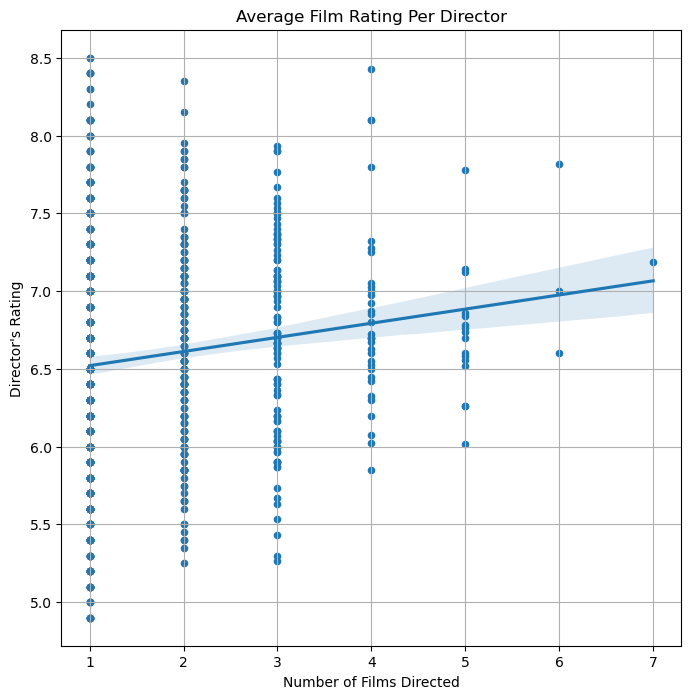

In [44]:
Director_Average_Summary.plot(kind="scatter", x="Number of Films Directed", y="Director's Rating", 
                              grid=True, figsize=(8,8),title="Average Film Rating Per Director")
sns.regplot(data=Director_Average_Summary, x="Number of Films Directed", y="Director's Rating", scatter=False)
slope, intercept, rvalue, pvalue, stderr=linregress(Director_Average_Summary["Number of Films Directed"], Director_Average_Summary["Director's Rating"])
correlation, p_value = st.pearsonr(Director_Average_Summary["Number of Films Directed"], Director_Average_Summary["Director's Rating"])

line_eq="y = "+ str(round(slope,2))+ "x + " +str(round(intercept,2))


print(f"The correlation is {correlation:.2f}")
print(f"The pvalue is {p_value:.4f}")
print(f"The r-squared is {rvalue**2}")
print(f"The Regression equation is {line_eq}")
plt.show()

C:\Users\judit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\judit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\judit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


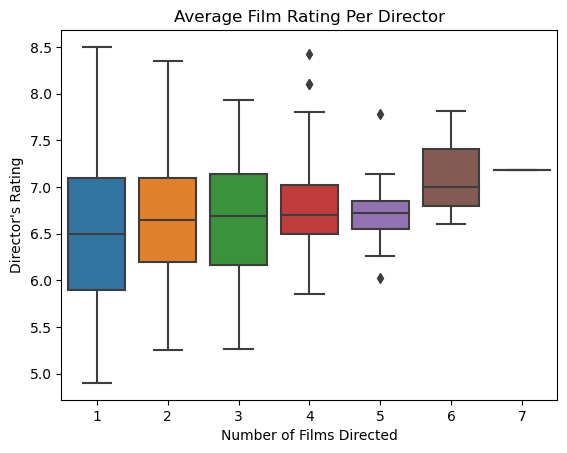

In [45]:
sns.boxplot(x=mVs_released_by_director, y=ave_Dir_mN_mR)
plt.title("Average Film Rating Per Director")
plt.xlabel("Number of Films Directed")
plt.ylabel("Director's Rating")
plt.show()
